# EDA and Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1) Missing value

### Dropping missing values

In [2]:
np.nan

nan

In [3]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

In [4]:
dic = {"name":name,"math":math,"science":science}

In [5]:
df = pd.DataFrame(dic)

In [6]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [7]:
df.isnull()

,name,math,science
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,True
4,False,False,False


In [8]:
df.isnull().sum()

name       0
math       1
science    2
dtype: int64

In [9]:
df.dropna()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [10]:
df.dropna(axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


In [11]:
# Drop by choice
df.drop(3)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
4,kevin,85.0,76.0


In [12]:
df.drop([1,3])

,name,math,science
0,john,89.0,78.0
2,jill,67.0,NaN
4,kevin,85.0,76.0


In [13]:
df.drop(["name","math"],axis=1)

,science
0,78.0
1,75.0
2,NaN
3,NaN
4,76.0


### Replacing missing values

In [14]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [15]:
df.fillna(0)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,0.0
3,kenny,0.0,0.0
4,kevin,85.0,76.0


In [16]:
math_mean = df["math"].mean()
science_mean = df["science"].mean()
print(math_mean)
print(science_mean)

79.75
76.33333333333333


In [17]:
df["math"].fillna(math_mean,inplace=True)

In [18]:
df["science"].fillna(science_mean,inplace=True)

In [19]:
df

,name,math,science
0,john,89.00,78.000000
1,jack,78.00,75.000000
2,jill,67.00,76.333333
3,kenny,79.75,76.333333
4,kevin,85.00,76.000000


#### cars dataset

In [20]:
cars = pd.read_csv("Automobile_data.csv")

In [21]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [22]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [24]:
cars["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
103     5
94      5
95      5
168     5
74      5
102     5
65      5
85      5
106     4
118     4
122     4
148     4
93      4
125     3
154     3
83      3
101     3
115     3
137     3
110     2
188     2
119     2
145     2
153     2
158     2
192     2
113     2
197     2
129     2
87      2
164     2
108     2
81      2
194     2
89      2
77      1
98      1
142     1
90      1
231     1
107     1
121     1
256     1
78      1
186     1
Name: normalized-losses, dtype: int64

In [25]:
cars["normalized-losses"].replace("?",np.nan,inplace=True)

In [26]:
cars["normalized-losses"] = cars["normalized-losses"].astype(float)

In [27]:
cars["normalized-losses"].fillna(cars["normalized-losses"].mean(),inplace=True)

In [28]:
cars["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
62      6
101     6
160     6
88      6
114     6
82      5
76      5
145     5
84      5
102     5
97      5
92      4
86      4
111     4
123     4
85      3
182     3
90      3
152     3
121     3
207     3
73      3
156     2
94      2
161     2
56      2
112     2
100     2
184     2
52      2
176     2
162     2
?       2
155     2
78      1
64      1
200     1
154     1
115     1
60      1
120     1
142     1
48      1
134     1
175     1
55      1
72      1
140     1
135     1
262     1
288     1
58      1
106     1
143     1
Name: horsepower, dtype: int64

In [29]:
cars["horsepower"].replace("?",np.nan,inplace=True)

In [30]:
cars["horsepower"] = cars["horsepower"].astype(float)

In [31]:
cars["horsepower"].fillna(cars["horsepower"].mean(),inplace=True)

In [32]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


## 2) Removing outliers

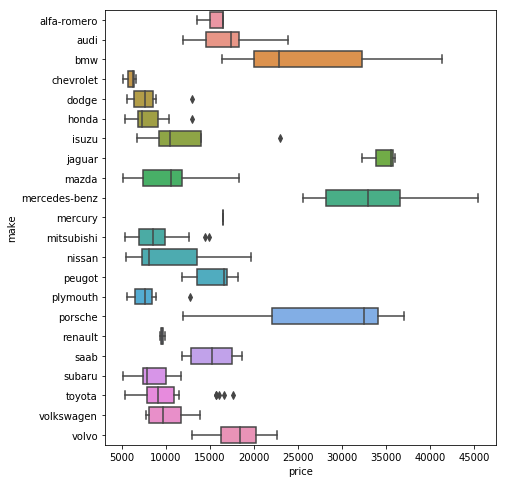

In [33]:
plt.figure(figsize=(7,8))
sns.boxplot(data=cars,x="price",y="make")
plt.show()

In [34]:
cars[(cars["make"]=="isuzu") & (cars["price"] > 20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [35]:
cars.drop(45,inplace=True)

In [36]:
cars[(cars["make"]=="plymouth") & (cars["price"] > 12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [37]:
cars.drop(124,inplace=True)

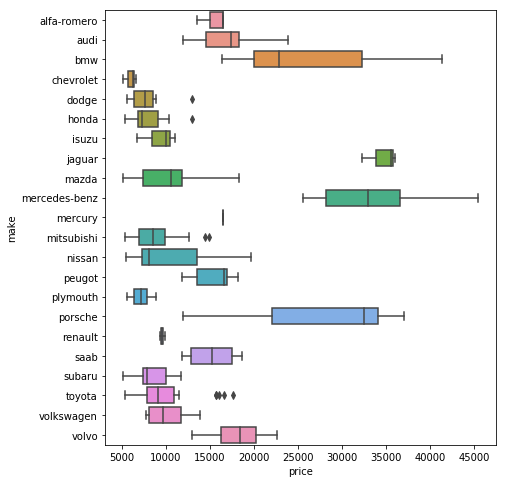

In [38]:
plt.figure(figsize=(7,8))
sns.boxplot(data=cars,x="price",y="make")
plt.show()

## 3) Handling categorical data

### Separating categorical and numerical data

In [39]:
cars_cat = cars.select_dtypes(object)
cars_num = cars.select_dtypes(["float64","int64"])

In [40]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [41]:
cars_cat["fuel-type"].value_counts()

gas       183
diesel     20
Name: fuel-type, dtype: int64

In [42]:
# One hot encoding
fuel_data = pd.get_dummies(cars_cat["fuel-type"])

In [43]:
fuel_data.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
#pd.concat([cars_cat,fuel_data],axis=1)

In [45]:
# Label encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
le.fit_transform(cars_cat["make"])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21])

In [49]:
for col in cars_cat:
    le = LabelEncoder()
    cars_cat[col] = le.fit_transform(cars_cat[col])

In [50]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


## 4) Skewness

In [51]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


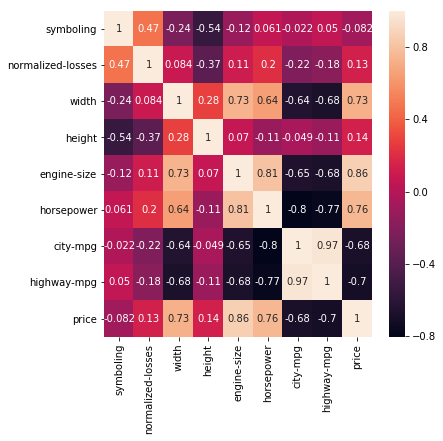

In [52]:
plt.figure(figsize=(6,6))
sns.heatmap(cars_num.corr(),annot=True)
plt.show()

symboling


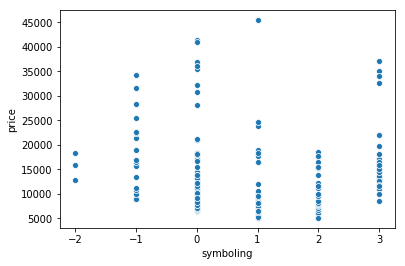

----------------------------------------
normalized-losses


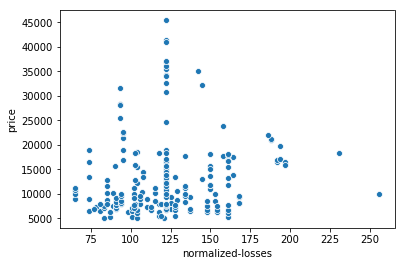

----------------------------------------
width


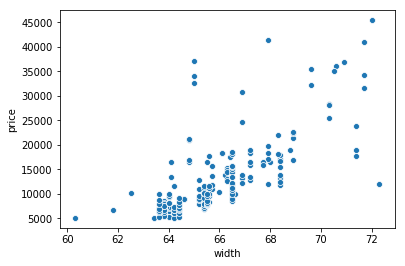

----------------------------------------
height


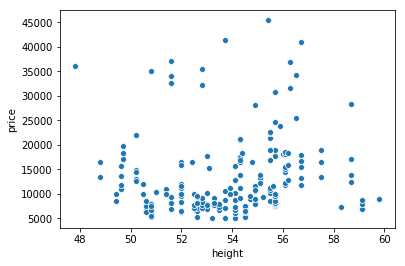

----------------------------------------
engine-size


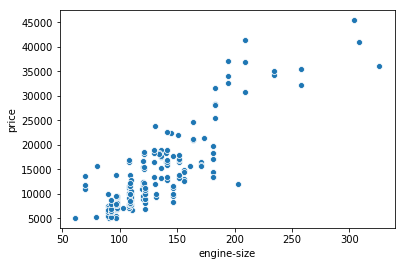

----------------------------------------
horsepower


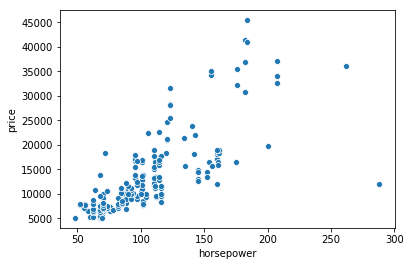

----------------------------------------
city-mpg


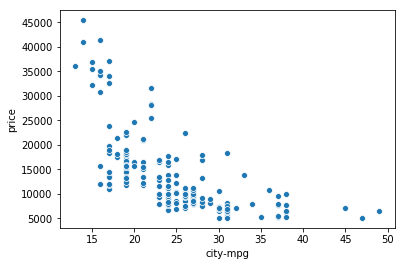

----------------------------------------
highway-mpg


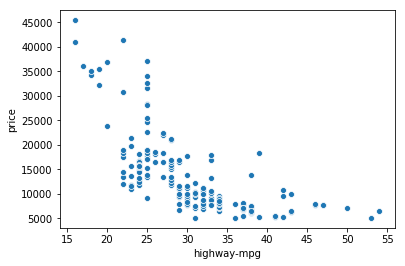

----------------------------------------
price


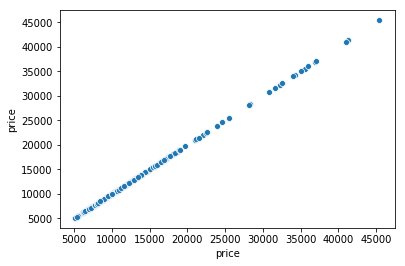

----------------------------------------


In [53]:
for col in cars_num:
    try:
        print(col)
        plt.figure()
        sns.scatterplot(data=cars_num,y="price",x=col)
        plt.show()
    except:
        pass
    print("----------------------------------------")

In [54]:
from scipy.stats import skew

skewness:  0.8443855299694787


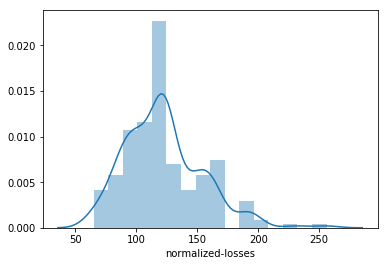

In [55]:
print("skewness: ",skew(cars_num["normalized-losses"]))
sns.distplot(cars_num["normalized-losses"])
plt.show()

skewness:  0.04840569764935829


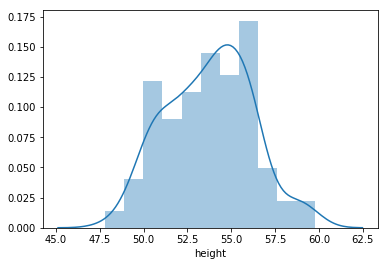

In [56]:
print("skewness: ",skew(cars_num["height"]))
sns.distplot(cars_num["height"])
plt.show()

In [57]:
# Removing skewness 
cars_num["normalized-losses"] = np.sqrt(cars_num["normalized-losses"])

skewness:  0.42362644855543496


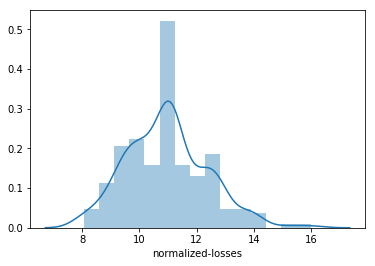

In [58]:
print("skewness: ",skew(cars_num["normalized-losses"]))
sns.distplot(cars_num["normalized-losses"])
plt.show()

## 5) Scaling

In [135]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [136]:
ss = StandardScaler()

In [138]:
ss.fit_transform(cars_num[["normalized-losses"]])

array([[ 0.06386822],
       [ 0.06386822],
       [ 0.06386822],
       [ 1.31702325],
       [ 1.31702325],
       [ 0.06386822],
       [ 1.1487557 ],
       [ 0.06386822],
       [ 1.1487557 ],
       [ 0.06386822],
       [ 2.06437979],
       [ 2.06437979],
       [ 1.96111972],
       [ 1.96111972],
       [ 0.06386822],
       [ 0.06386822],
       [ 0.06386822],
       [ 0.06386822],
       [ 0.03158655],
       [-0.75160004],
       [-1.39173556],
       [-0.06606723],
       [-0.06606723],
       [-0.06606723],
       [ 0.86104535],
       [ 0.86104535],
       [ 0.86104535],
       [ 0.86104535],
       [-0.33272094],
       [ 0.77284885],
       [ 0.53309404],
       [ 0.53309404],
       [-0.64457996],
       [-0.64457996],
       [-0.64457996],
       [-0.33272094],
       [-1.5114648 ],
       [-0.46968604],
       [-0.46968604],
       [-1.23549432],
       [-1.23549432],
       [-1.23549432],
       [-0.43520586],
       [ 0.06386822],
       [ 0.06386822],
       [ 0

In [139]:
mm = MinMaxScaler()

In [140]:
mm.fit_transform(cars_num[["normalized-losses"]])

array([[0.37581256],
       [0.37581256],
       [0.37581256],
       [0.59764988],
       [0.59764988],
       [0.37581256],
       [0.56786265],
       [0.37581256],
       [0.56786265],
       [0.37581256],
       [0.72994921],
       [0.72994921],
       [0.7116698 ],
       [0.7116698 ],
       [0.37581256],
       [0.37581256],
       [0.37581256],
       [0.37581256],
       [0.37009796],
       [0.23145589],
       [0.11813715],
       [0.352811  ],
       [0.352811  ],
       [0.352811  ],
       [0.51693129],
       [0.51693129],
       [0.51693129],
       [0.51693129],
       [0.30560714],
       [0.50131847],
       [0.45887635],
       [0.45887635],
       [0.25040091],
       [0.25040091],
       [0.25040091],
       [0.30560714],
       [0.09694232],
       [0.28136116],
       [0.28136116],
       [0.14579545],
       [0.14579545],
       [0.14579545],
       [0.28746495],
       [0.37581256],
       [0.37581256],
       [0.37581256],
       [0.50131847],
       [0.375

### Merging categorical and numerical column

In [145]:
cars_new = pd.concat([cars_num,cars_cat],axis=1)

In [146]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


## 6) Feature Engineering

In [147]:
cars_new["area"] = cars_new["height"] * cars_new["width"]

In [148]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,area
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0,3128.08
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0,3128.08
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5,3432.20
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3,3594.66
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3,3605.52
